In [2]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [3]:

test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPED_FITHRF_GLMDENOISE_RR.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPEC_FITHRF_GLMDENOISE.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPEB_FITHRF.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time/aot/analysis/glmsingle/outputs/mainexp/sub-001_ses-01/TYPEA_ONOFF.npy'

fs_dir = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer'


test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#R2 = test_data['onoffR2']
R2 = test_data['R2']
##meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
#HRFindex = test_data['HRFindex']
#fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print(betas.shape)
# #switch the first and second dimension
# betas = np.swapaxes(betas,0,1)

#betamean = np.mean(betas,axis=3)
#print(betamean.shape)





HRFindex
HRFindexrun
glmbadness
pcvoxels
pcnum
xvaltrend
noisepool
pcregressors
betasmd
R2
R2run
rrbadness
FRACvalue
scaleoffset
meanvol
(73, 97, 83, 1296)


/tank/tkn219/projects/nilearn/nilearn/reporting/html_document.py:60: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



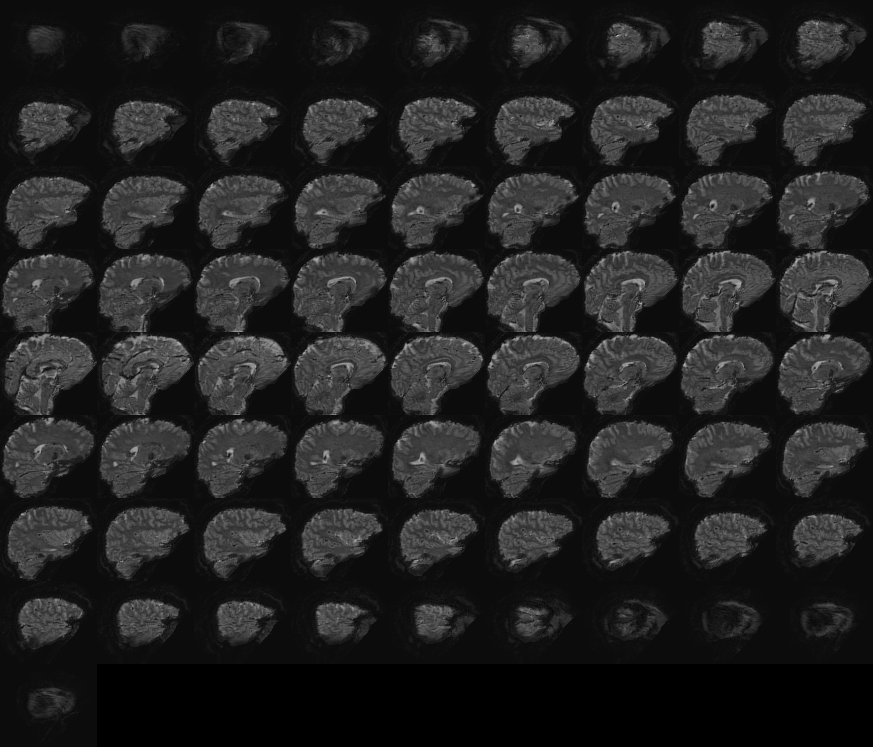
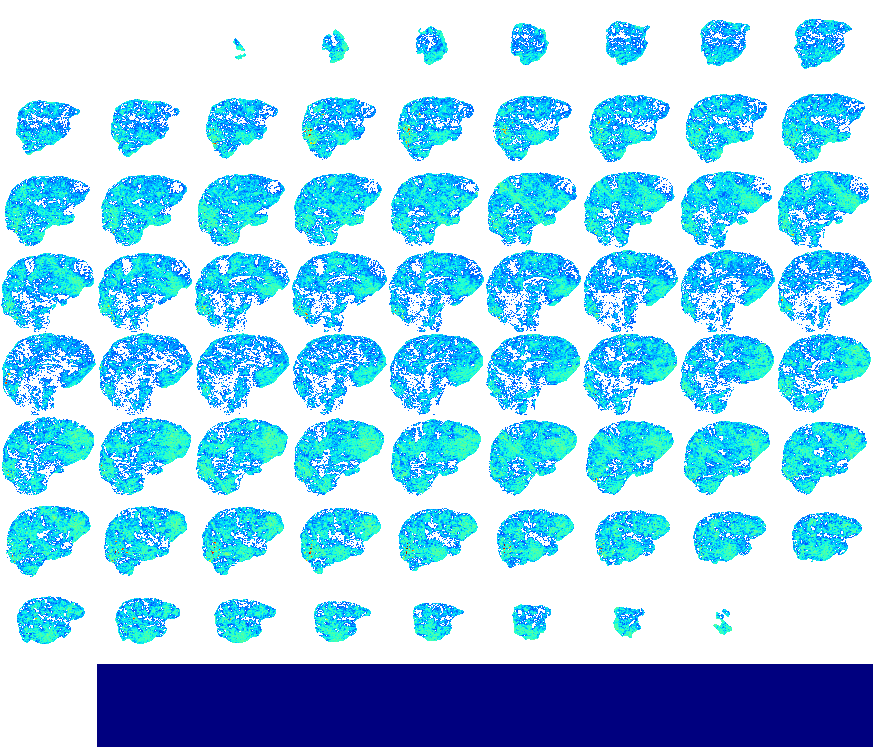

In [23]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc03/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc03/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/aotfull_preprocs/fullpreproc03/sub-001/ses-01/func/sub-001_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2)
R2_masked[bmask] = R2[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

# Use the colormap used in the NSD paper for this figure
view_img(R2_img, threshold=15, vmax=75, cmap='jet', symmetric_cmap=False, bg_img=bg_image_fn, opacity=0.7)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)


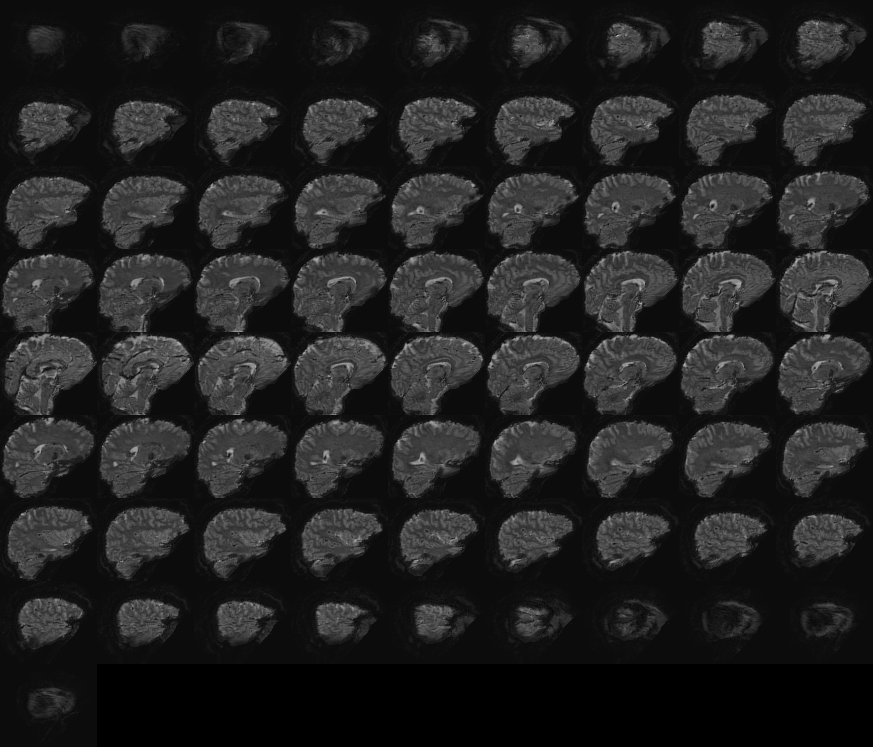
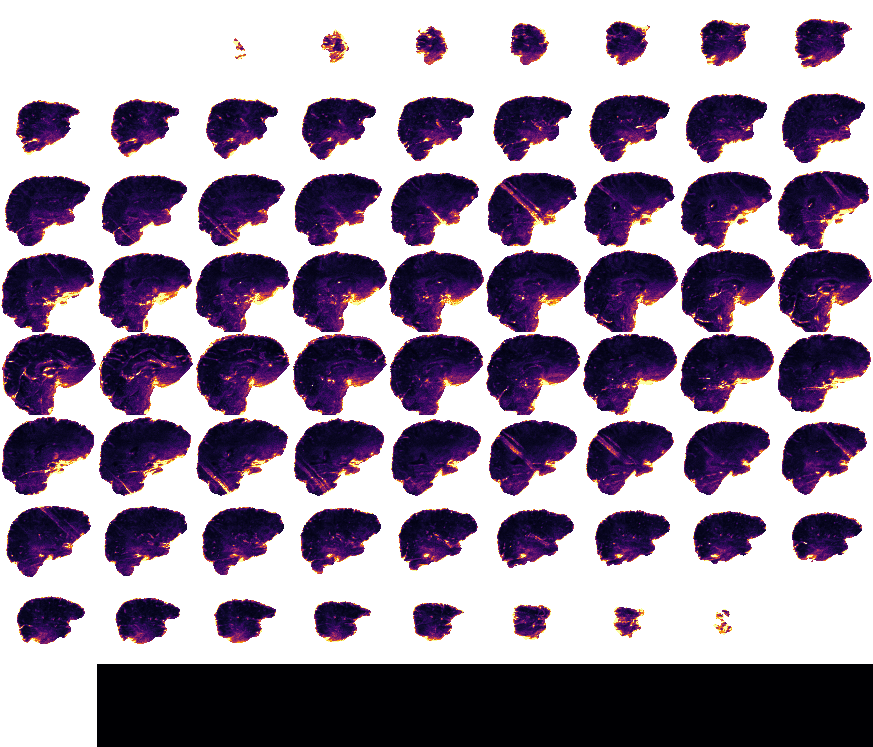

In [9]:
mean_betas = np.linalg.norm(betas, axis=3)

betas_masked = np.zeros_like(mean_betas)
betas_masked[bmask] = mean_betas[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
betas_img = nib.Nifti1Image(betas_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(betas_img, threshold=0, vmax=500, cmap='inferno', symmetric_cmap=False, bg_img=bg_image_fn)

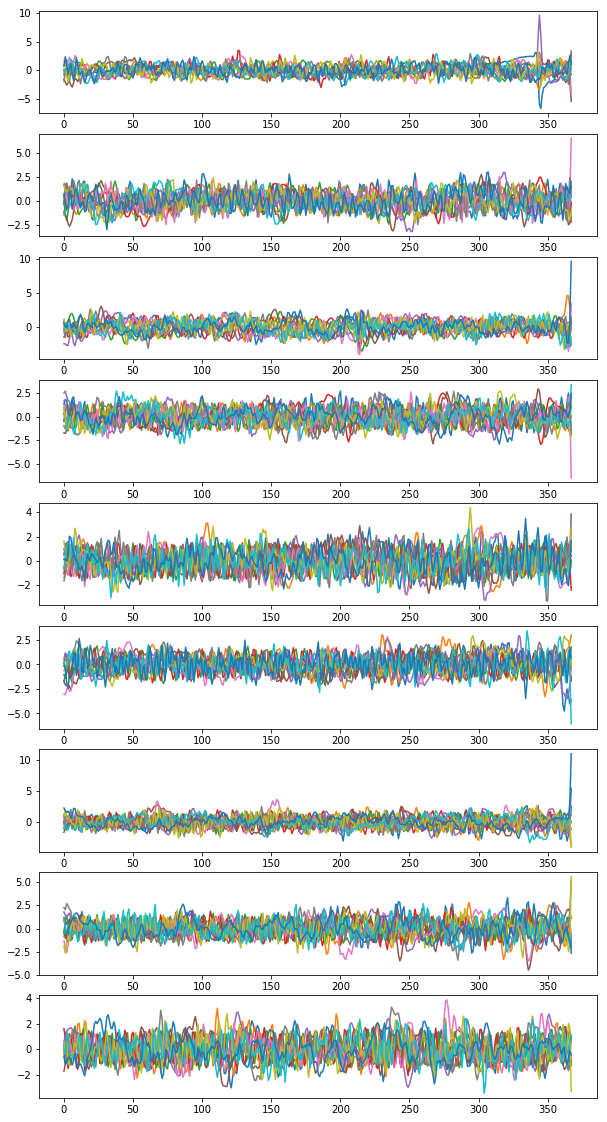

In [17]:
f, ss = plt.subplots(len(test_data['pcregressors']), 1,figsize=(10,20))

for i, tdpc in enumerate(test_data['pcregressors']):
    ss[i].plot(tdpc)